In [1]:
import numpy as np
import NR_a2_1_utils as utils1
import NR_a2_3_utils as utils3
from matplotlib import pyplot as plt
from importlib import reload
from scipy import stats
reload(utils1)
reload(utils3)
seed = 42
print('Original seed:',seed)
rng = utils1.rng(seed)

Original seed: 42


# 3. Linear Structure growth

In [ ]:
reload(utils3)
ode = lambda y,t : -y
ode_int = utils3.runge_kutta(0,10,ode,10)
print(ode_int)
reload(utils3)
ode = lambda y,t : -y*t
ode_int = utils3.runge_kutta(0,10,ode,10)
print(ode_int)

In [26]:
reload(utils3)
f = lambda t,x1,x2: x2
g = lambda t,x1,x2: -4/(3*t)*x2 + 2/(3*t**2)*x1
case1,yt1 = utils3.runge_kutta2nd(3,2,1,1000,f,g)
case2,yt2 = utils3.runge_kutta2nd(10,-10,1,1000,f,g)
case3,yt3 = utils3.runge_kutta2nd(5,0,1,1000,f,g)
print(f'case1: {case1},case2: {case2}, case3: {case3}')

case1: 179759.9884607269,case2: 606.5532637765943, case3: 179881.2991134862


In [34]:
reload(utils3)
f = lambda t,x1,x2 : x2
g = lambda t,x1,x2 : x1*6-x2
#y,yt = utils3.runge_kutta2nd(3,1,1,f,g)
#print(y)

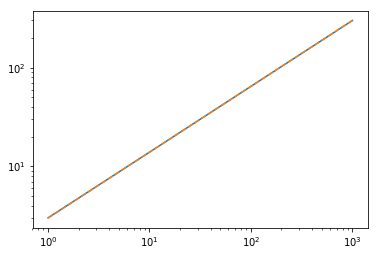

In [40]:
#D = lambda t,c1,c2 : c1*t**(2/3)+c2/t
D = lambda t : 3*t**(2/3)
t = np.arange(1,1000+0.01,0.01)
plt.plot(t,yt1)
#plt.plot(t,D(t,0.5*np.exp(4),3-0.5*np.exp(4)))
plt.plot(t,D(t),linestyle='--')
plt.xscale('log')
plt.yscale('log')

# 4. Zeldovich Approximation

Integrate up to $z=50$: 

$D(z) = \frac{5\Omega_mH_0^2}{2}H(z)\int_z^\infty\frac{1+z'}{H^3(z')}dz'$

Where: 

$H(z)^2 = H^2_0(\Omega_m(1+z)^3+\Omega_\Lambda)$



In order to avoid having to integrate up to $\infty$ we will be substituting $z = \frac{1}{a} -1$. This gives us the following equations: 


$ D(a) = \frac{5\Omega_mH_0^2}{2}H(z)\int_0^a\frac{1}{a^3'H^3(z')}da' $

Where: 

$H(a)^2 = H^2_0(\frac{\Omega_m}{a^3}+\Omega_\Lambda)$

In [6]:
omega_m = 0.3
omega_lambda = 0.7
H0 = 70 # km/s/Mpc

H = lambda a : (H0**2*(omega_m*(a)**(-3)+omega_lambda))**0.5
D_prefactor = lambda a : (5*omega_m*H0**2)/2*H(a)
D_int = lambda a: (1+a)/(H(a)**3)
a = 1/51
D = D_prefactor(a) * utils1.romber_int(D_int,1e-12,a)
print(D)

6.830284178986103e-08
